# Data Science Test


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
df=pd.read_csv('cancer_data.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label
0,45.0,26.850000,92.0,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
1,49.0,21.367521,78.0,2.640,0.507936,6.3339,3.886145,22.94254,737.672,2
2,72.0,25.590000,82.0,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2
3,44.0,20.760000,86.0,7.553,1.600000,14.0900,20.320000,7.64000,63.610,1
4,47.0,22.030000,84.0,2.869,0.590000,26.6500,38.040000,3.32000,191.720,1


In [3]:
df.shape

(116, 10)

# Exploring the dataset


## What proportion of patients with identified cancer are below 50 years of age?


In [4]:
df1 = df[(df['Age'] < 50) & (df['Label'] == 2)]
print(df1.head())

print("The total proportion of patients with identified cancer below 50 years are",len(df1))

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0   45.0  26.850000     92.0    3.330  0.755688  54.6800    12.100000   
1   49.0  21.367521     78.0    2.640  0.507936   6.3339     3.886145   
7   46.0  22.210000     86.0   36.940  7.836205      NaN     9.760000   
14  45.0  21.303949    102.0   13.852  3.485163   7.6476    21.056625   
16  34.0  24.242424     92.0   21.699  4.924226  16.7353    21.823745   

    Resistin    MCP.1  Label  
0   10.96000  268.230      2  
1   22.94254  737.672      2  
7    5.68000  312.000      2  
14  23.03408  552.444      2  
16  12.06534  481.949      2  
The total proportion of patients with identified cancer below 50 years are 28


## What is the standard deviation of resistin?

In [5]:
# declare the resistin
resistin=df['Resistin']
standard_deviation = np.std(resistin)
print("the standard deviation of resistin is ",standard_deviation)

the standard deviation of resistin is  12.337122119975472


## Compare the distribution of BMI for patients identified with cancer over 50, to the  distribution of BMI for patients identified with cancer who are under 50. What if you  consider only the people in the 50+ group who have increased fasting blood glucose  (Glucose) and insulin (Insulin)?

In [6]:
from scipy.stats import norm
BMI_1=df.BMI[(df['Age'] > 50)]
BMI_2=df.BMI[(df['Age'] < 50)]

### Z_test age greater than 50

In [7]:
len(BMI_1)

64

In [8]:
np.mean(BMI_1)

28.132829592031246

In [9]:
from statsmodels.stats.weightstats import ztest as ztest
#perform one sample z-test
Ztest ,propability_value =ztest(BMI_1,value=28)

In [10]:
print(float(propability_value))
if propability_value<0.05:
    
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")

0.8151086136696934
Null hyphothesis accepted , Alternative hyphothesis rejected


### Z_test age less than 50

In [11]:
np.mean(BMI_2)

26.554810971333332

In [12]:
BMI_2=BMI_2.fillna(20)

In [13]:
#perform one sample z-test
Z_test ,propability_value =ztest(BMI_2,value=27)

In [14]:
print(float(propability_value))
if propability_value<0.05:
    
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")

0.44482534938043117
Null hyphothesis accepted , Alternative hyphothesis rejected


yes we clealry seen that people of age 50 above have increase glucose and insulin

## Produce summary statistics or visualisations

In [15]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Label
count,111.000000,115.000000,115.000000,113.000000,113.000000,114.000000,114.000000,116.000000,113.000000,116.000000
mean,57.297297,27.563018,97.808696,10.172336,2.666895,26.648911,10.244530,14.725966,538.201381,1.551724
std,16.349365,5.037874,22.623112,10.152083,3.620716,19.253833,6.878735,12.390646,349.065274,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.946410,85.500000,4.420000,0.960273,12.360750,5.480153,6.881763,270.142000,1.000000
50%,57.000000,27.636054,92.000000,6.042000,1.383997,20.271000,8.352692,10.827740,473.859000,2.000000
75%,71.000000,31.244295,102.000000,11.910000,2.853119,36.890300,11.871990,17.755207,703.973000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


## Count plot

Number of patient that have cancer :  64
Number of patient that dont have cancer :  52


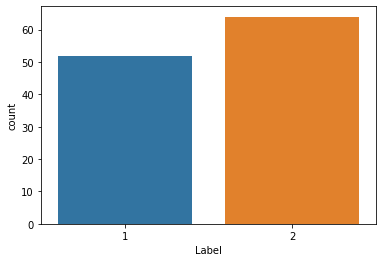

In [16]:
ax = sns.countplot(df.Label,label="Count")       
Cancer, Not_Cancer = df.Label.value_counts()
print('Number of patient that have cancer : ',Cancer)
print('Number of patient that dont have cancer : ',Not_Cancer)

### Histogram

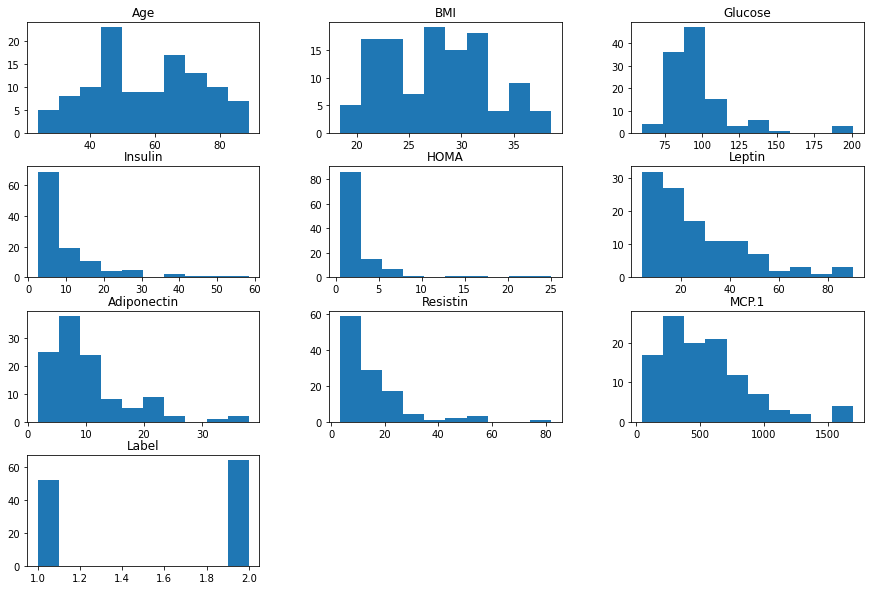

In [17]:
hist_mean = df.hist(bins=10, figsize=(15, 10),grid=False)

### Kde plot

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

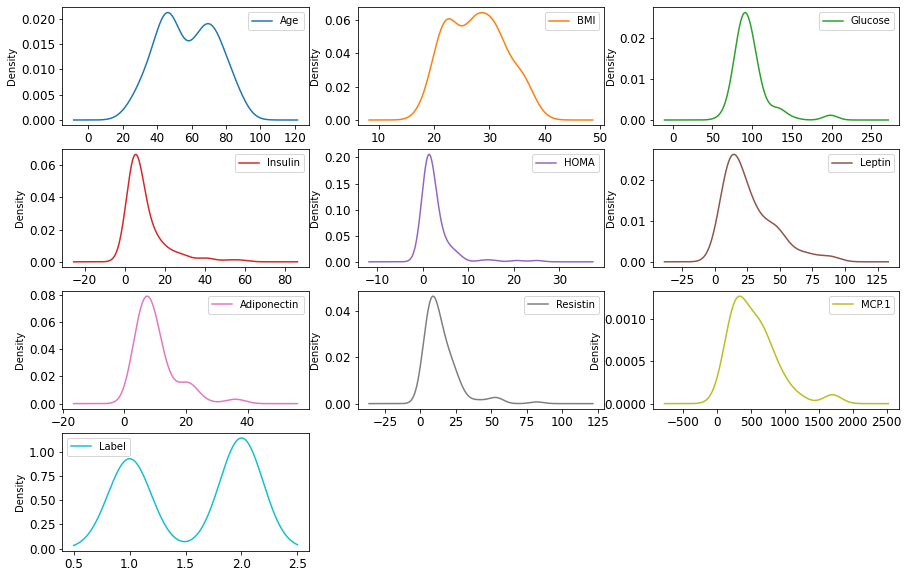

In [18]:
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False, sharey=False, fontsize=12, figsize=(15,10))

## Box and whisker plot

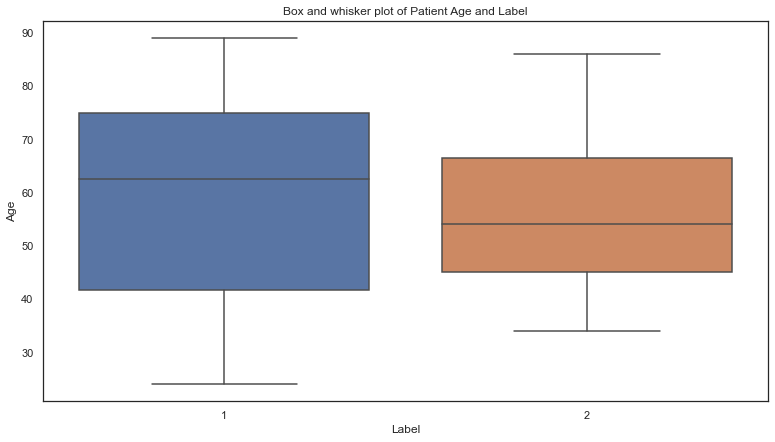

In [58]:
plt.title("Box and whisker plot of Patient Age and Label")
sns.boxplot(x=df.Label,y=df.Age, data=df)
plt.show()

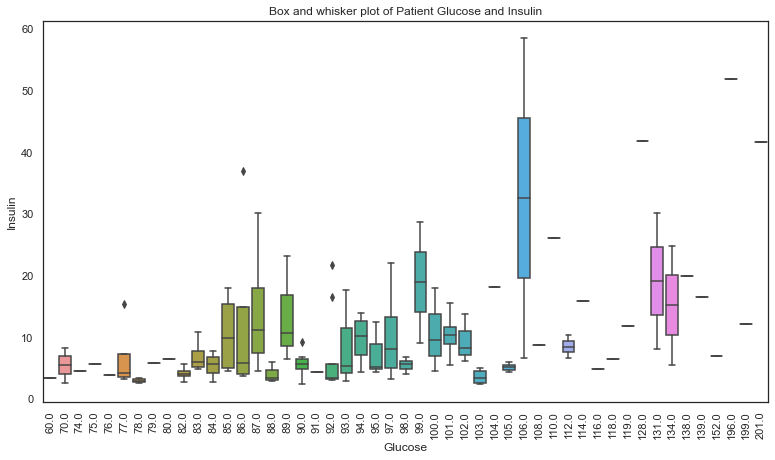

In [59]:
plt.rcParams['figure.figsize'] = [13, 7]
plt.title("Box and whisker plot of Patient Glucose and Insulin")
sns.boxplot(x=df.Glucose,y=df.Insulin, data=df)
plt.xticks(rotation=90)
plt.show()

In [55]:
df.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Label'],
      dtype='object')

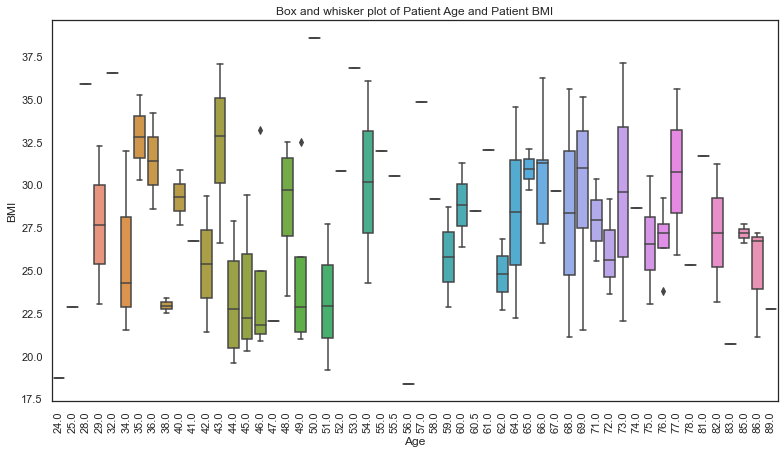

In [60]:
plt.rcParams['figure.figsize'] = [13, 7]
plt.title("Box and whisker plot of Patient Age and Patient BMI")
sns.boxplot(x=df.Age,y=df.BMI, data=df)
plt.xticks(rotation=90)
plt.show()

In [61]:
df.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Label'],
      dtype='object')

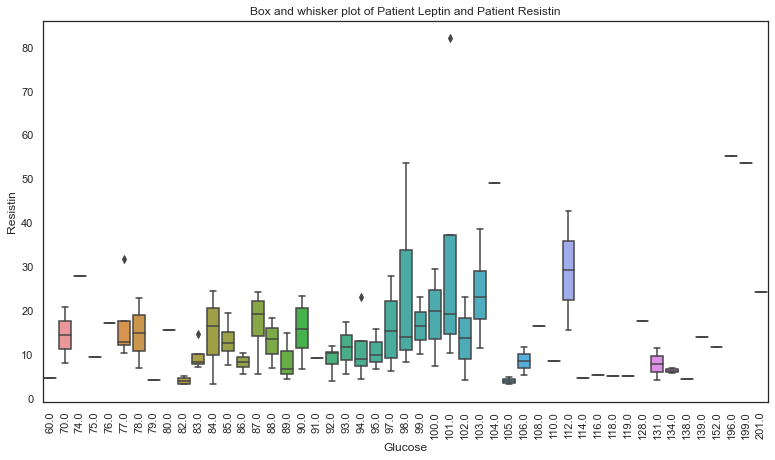

In [64]:
plt.rcParams['figure.figsize'] = [13, 7]
plt.title("Box and whisker plot of Patient Glucose and Patient Resistin")
sns.boxplot(x=df.Glucose,y=df.Resistin, data=df)
plt.xticks(rotation=90)
plt.show()

### Heatmap

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

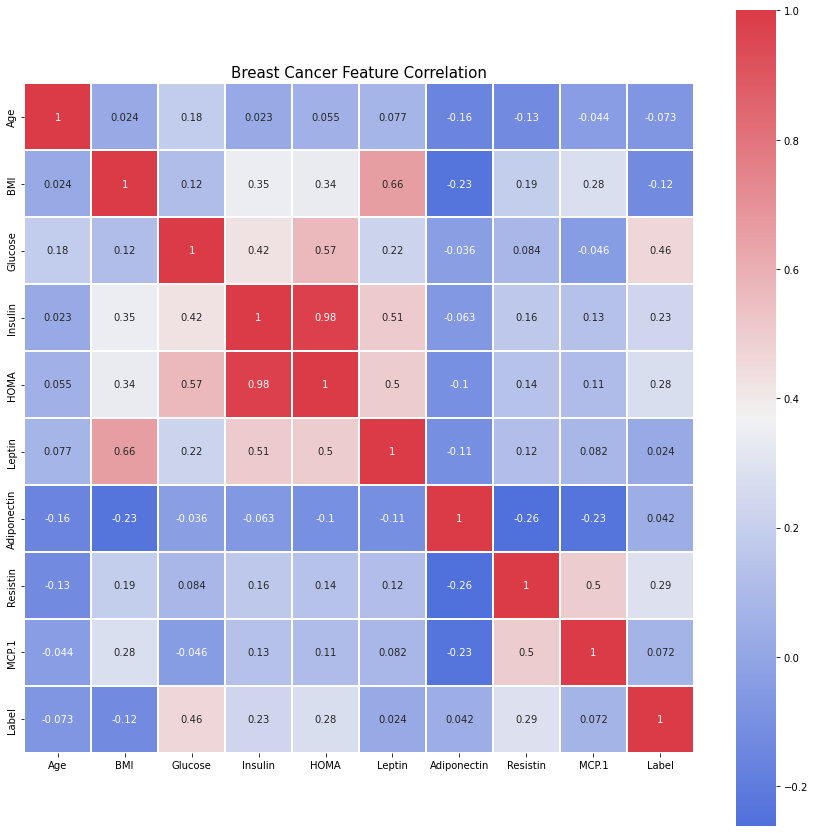

In [19]:

fig, ax = plt.subplots(figsize=(15,15))   
plt.title('Breast Cancer Feature Correlation',fontsize=15)
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df.corr("spearman"),ax=ax, annot=True, square='square', cmap=cmap, linewidths=2)

### Pairplot

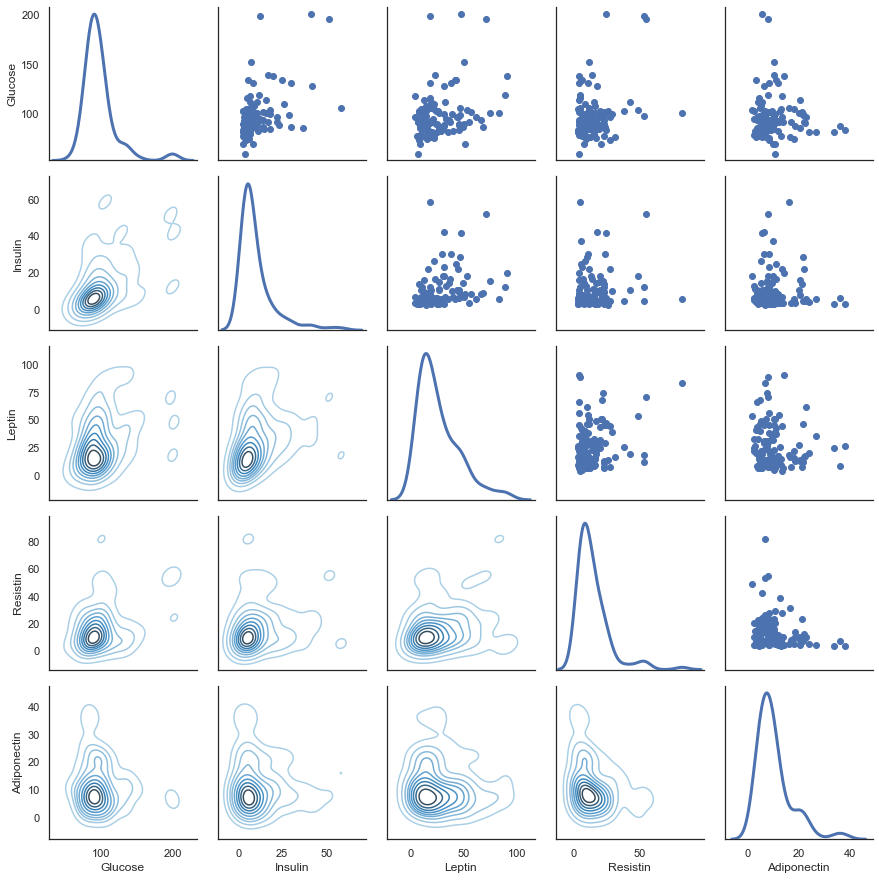

In [20]:
sns.set(style="white")
df_new = df.loc[:,['Glucose','Insulin','Leptin','Resistin','Adiponectin']]
g = sns.PairGrid(df_new, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

### Jointplot

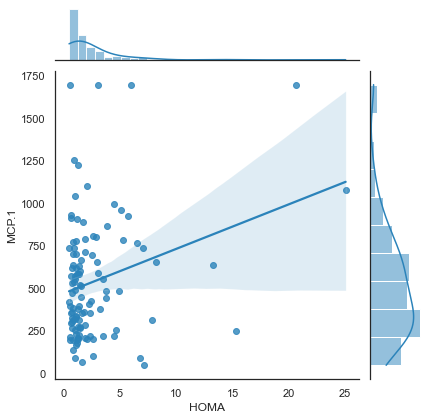

In [21]:
sns.jointplot(df.loc[:,'HOMA'],
              df.loc[:,'MCP.1'],
              kind="reg",
              color="#2b83ba");


The relationship between HOMA and MCP-1 is not exactly linear. MCP-1 is very high at the initial HOMA. Joinplot also shows the distribution with relationship.Jointplot also plot the regression line this is best fit line according to all data point   

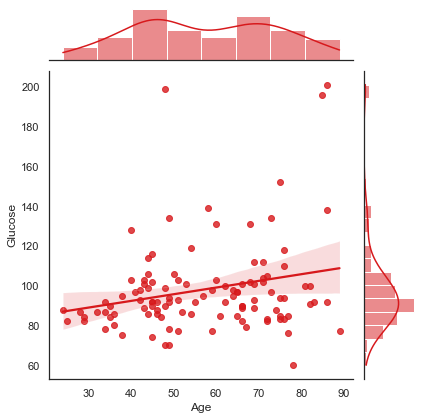

In [22]:
sns.jointplot(df.loc[:,'Age'],
              df.loc[:,'Glucose'],
              kind="reg",
              color="#d7191c");

The relationship between Age and Glucose is strongly linear. The patient with more age have more glucose and their is some outliers such as some people have age of 80 have 60 glucose and some patient have 200 glucose at the age 48. 

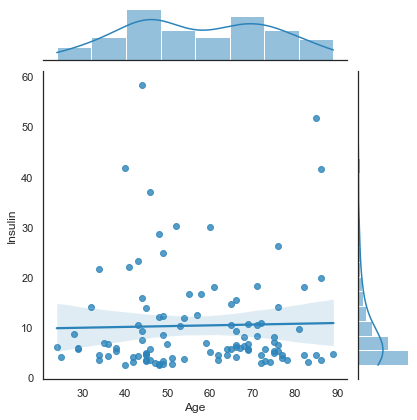

In [23]:
sns.jointplot(df.loc[:,'Age'],
              df.loc[:,'Insulin'],
              kind="reg",
              color="#2b83ba");

There is no as such relationship between Age and insulin because regression line that is also called best fit line is almost contant so correlation between these features is almost zero.

## Are there particular patient types

No there is no any particular patient types in this dataset

## Have you identified problems with the provided data, and if yes how do they affect modelling?

Yes there are only 116 rows in the dataset that is not enough to train a robust model. This dataset might have some more features about the patient record such as Gender,Last visit,Size of cancer etc for more accurate prediction 
Because model need maximum records to learn the all aspects of the data and then make a good prediction on unseen data.
Moreover small data may cause overfitting and undefirtting so model selection is very important for small datasets.

## What are your recommendations regarding future data collection?

Collect more data and also take more records of patient with patient name , gender , previous history. Make dataset atleast 1200-1500 rows.
Collect the data through all methods such as survey, experements,interviews etc.So in this way you get the data of different patient that have different glucose, insulin etc 
so it create a great chance for model to learn more better.

# Creating a model

## Briefly discuss any assumptions made about the data

i assume that there is no garbage values in this dataset and i assume that data needs to normalize and i assume that there is many missing values in the dataset so i fill the missing values using interpolate method. All data is numeric so there is no need to use label encoder and one hot encoder 

## Pre-process the data (if necessary)


In [24]:
df.shape

(116, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          111 non-null    float64
 1   BMI          115 non-null    float64
 2   Glucose      115 non-null    float64
 3   Insulin      113 non-null    float64
 4   HOMA         113 non-null    float64
 5   Leptin       114 non-null    float64
 6   Adiponectin  114 non-null    float64
 7   Resistin     116 non-null    float64
 8   MCP.1        113 non-null    float64
 9   Label        116 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 9.2 KB


In [26]:
df.isnull().sum()

Age            5
BMI            1
Glucose        1
Insulin        3
HOMA           3
Leptin         2
Adiponectin    2
Resistin       0
MCP.1          3
Label          0
dtype: int64

In [27]:
df.interpolate(method='linear',inplace=True)

In [28]:
df.isnull().sum()

Age            0
BMI            0
Glucose        0
Insulin        0
HOMA           0
Leptin         0
Adiponectin    0
Resistin       0
MCP.1          0
Label          0
dtype: int64

In [29]:
#dependent and independent features
x=df.drop('Label',axis=1)
y=df['Label']

In [30]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=42)

In [31]:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Build a proof of concept model to predict the “label” column from the customer data

In [32]:
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
pred = model.predict(X_test)

## Evaluate the performance of your model, using appropriate metrics

In [34]:
print("the precsion score is : ",precision_score(y_test, pred))
print("the recall score is :",recall_score(y_test, pred))
print("the f1 measure is ",f1_score(y_test, pred))

the precsion score is :  0.5428571428571428
the recall score is : 0.9047619047619048
the f1 measure is  0.6785714285714285


### Accuracy Score

In [35]:
acc=accuracy_score(y_test,pred)
print("The accuracy of random forest is",acc)


The accuracy of random forest is 0.660377358490566


### Confusion Matrix

<AxesSubplot:>

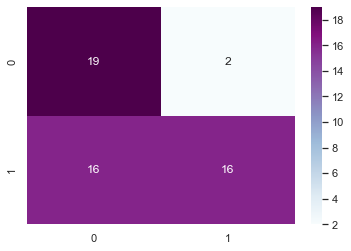

In [36]:
cm=confusion_matrix(y_test, pred)
sns.heatmap(cm,annot=True,cmap="BuPu")

### Roc and AUC score

In [37]:

lr_probs = model.predict_proba(X_test)

In [38]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [39]:
lr_auc = roc_auc_score(y_test, lr_probs)

In [40]:
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

Random Forest: ROC AUC=0.845


In [41]:
y_test = y_test.map({2: 1, 1: 0}).astype(int)



In [42]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

### Roc Plot

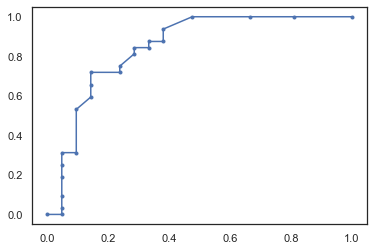

In [43]:
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

### Important Feature

<AxesSubplot:>

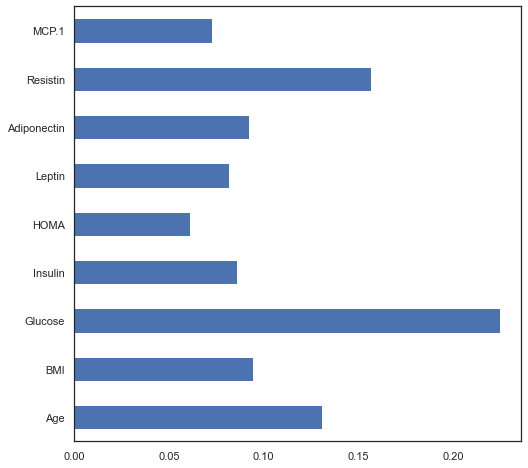

In [44]:
# extract feature importances, convert into a Series
importances = pd.Series(model.feature_importances_, index=x.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(8,8))

## How would the model perform on unseen data?

Model performance is very good on unseen data. so i train the model on 60% training data and evaluate the model 
on 40% unseen data and model performance is 74% on unseen data and precision , recall and f1 score on unseen data 
is also very good.The auc and roc score of model is 81 % so overall model performance on unseen data is also very good. It will improve when increase the number of records and number of features.